# Projeto  - Ciência dos Dados

**Alunos:**

Gabriela Mitu

Fernando Avila

--------
## Introdução

O câncer de mama se caracteriza pela proliferação anormal, de forma rápida e desordenada, das células do tecido mamário. Ele representa o principal tipo de câncer na mulher. A doença se desenvolve em decorrência de alterações genéticas, podendo alterar a habilidade da célula de manter sua divisão e reprodução sob controle, produzindo células em excesso, formando o tumor, o qual pode ser benigno (não perigoso para a saúde) ou maligno (tem o potencial de ser perigoso).

Os benignos não são considerados cancerígenos: suas células têm aparência próxima do normal. Elas crescem lentamente e não invadem os tecidos vizinhos, nem se espalham para outras partes do corpo. Já os tumores malignos são cancerosos. Caso suas células não sejam controladas, podem crescer e invadir tecidos e órgãos vizinhos, eventualmente se espalhando para outras partes do corpo.

Este tipo de câncer, segundo a Agência Internacional de Pesquisa em Câncer (IARC), é o quinto em questão de mortalidade no mundo, sendo estimadas mais de 627 mil mortes em 2018 - o que representa 6,6% do total de mortes por todos os tipos da doença. A pesquisa também aponta que uma a cada quatro mulheres que têm um caso de câncer diagnosticado têm câncer de mama, representando 24,2% do total.

O câncer de mama geralmente apresenta um bom índice de cura, principalmente quando diagnosticado em sua fase precoce. Visto isso, a previsão da doença é considerada um dos mais importantes assuntos na seção de análise de dados clínicos. Desta forma, a mineração de dados transforma a grande coleção de dados brutos de assistência médica em informações que podem auxiliar na tomada de decisões.

Portanto, com o objetivo de apoiar este estudo, foi escolhido este tema de análise de câncer de mama para o Projeto 2 de Ciência de Dados com a uso de ferramentas como o python para desenvolver um Machine Learning através de um DataSet do repositório da UCI.

O método utilizado será o de aprendizado supervisionado com o intuito de prever um rótulo (se alguém ser diagnosticado ou não com o câncer).
Para atingir esse objetivo, foram selecionados alguns atributos a serem analisados, contidos nas colunas do dataset.  Eles estão relacionados com exames de pacientes. É importante ressaltar que apenas um destes fatores isolados não é suficiente para o surgimento de uma doença, porém a combinação de alguns pode ser determinante.


**Atributos que serão analisado**

- Diagnosis: Diagnóstico (M = maligno, B = benigno)

- O Data Set é dividido em três partes: Média (média de todas as células, colunas 3-13), Erro padrão (erro padrãode todas as células, colunas 13-23) e Pior (significa a pior célula, colunas 23-32) e cada um contém 10 parâmetros (valores calculados para cada núcleo celular):
    - Radius: Raio (média das distâncias do centro aos pontos no perímetro)
    - Texture: Textura (desvio padrão dos valores da escala de cinza)
    - Perimeter: Perímetro
    - Area: Área
    - Smoothness: Suavidade (variação local nos comprimentos do raio)
    - Compactness: Compacidade (perímetro ^ 2 / área - 1,0)
    - Concavity: Concavidade (severidade das porções côncavas do contorno)
    - Concave points: Pontos côncavos (número de partes côncavas do contorno)
    - Symmetry: Simetria
    - Fractal Dimension: Dimensão fractal ("aproximação da costa" - 1)


## Preparando o ambiente no jupyter:

In [76]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
#from sklearn.cross_validation import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics 

In [77]:
dados=pd.read_csv("data.csv")

_______
## Adaptação do DataSet 

In [4]:
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Observando cada categoria a ser considerada, pode-se perceber que há uma coluna chamada "Unnamed:32" onde todos os valores são "Nan", ou seja, significa que todos os valores são nulos nesta coluna, portanto, não podemos usar esta coluna para nossa análise. Outro atributo que será retirado é o "Id", que não será relevante também para a pesqusia.

Então, o código abaixo, tira ambos do Data Set.

In [5]:
# Tirando a coluna Unnamed: 32
dados.drop("Unnamed: 32",axis=1,inplace=True)

# Tirando a coluna Id
dados.drop("id",axis=1,inplace=True)

In [6]:
print(len(dados.columns))

31


Como foi explicado anteriormente, pode-se dividir o Data Set em três partes: Média, Erro padrão, e Pior. Então, em código divide-se as colunas:

In [7]:
features_mean= list(dados.columns[1:11])
features_se= list(dados.columns[11:20])
features_worst=list(dados.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


Agora, sobre a coluna de diagnóstico que se encontra fora dessa classificação que foi feita no código anterior, é possível mapeá-lo para um valor inteiro, já que é um objeto

In [8]:
dados['diagnosis']=dados['diagnosis'].map({'M':1,'B':0})

Assim, maligno será equivalente a 1 (um) e benigno a 0 (zero)

________
## Visualização de dados

Para se ter uma visão geral dos dados e variáveis a serem analisadas, faz-se o comando describe:

In [9]:
dados.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


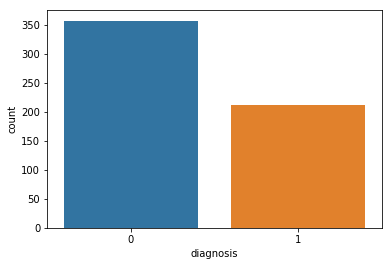

In [10]:
sns.countplot(dados['diagnosis'],label="Count")

No gráfico acima, pode-se observar que existe um maior número de casos benignos do que malignos de estágios de câncer.

Fazendo um gráfico de correlação com HeatMap, é possível analisar multicolinearidade entre as colunas, o que significa que uma está dependendo da outra. Deve-se evitar isso porque não há motivo de usar a mesma coluna duas vezes.

Para fazer esse estudo de forma organizada, primeiramente, será realizado com as features da parte Média (divisão do Data Set):

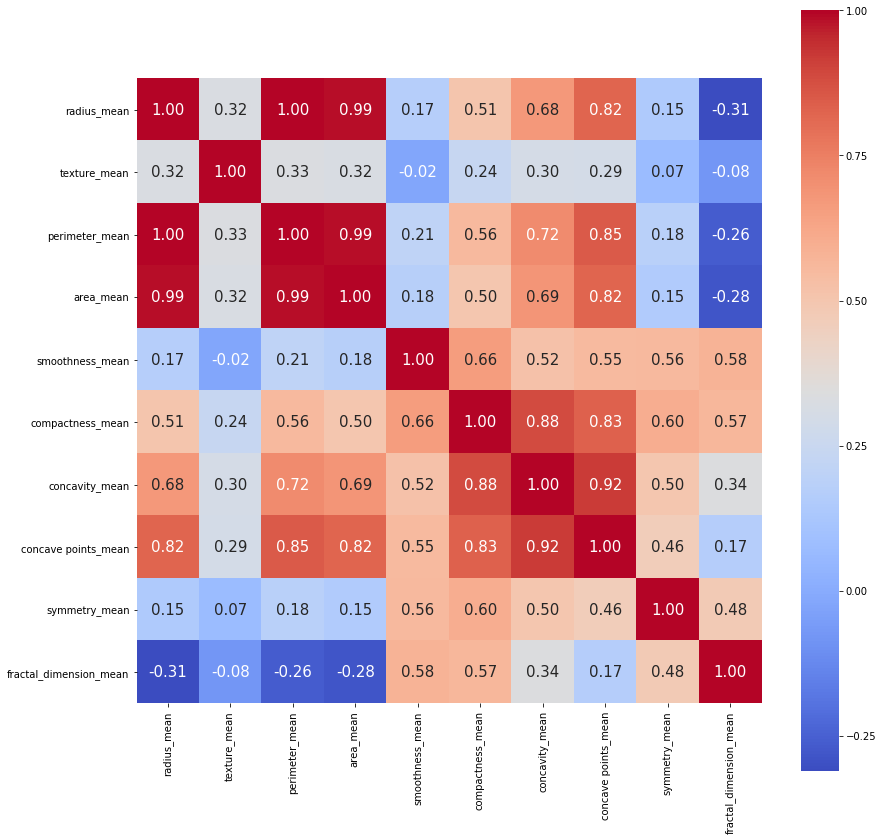

In [11]:
corr = dados[features_mean].corr() # Para achar correlação
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') 

**Observações:**

- O raio, o perímetro e a área estão altamente correlacionados conforme o esperado de suas relações, portanto, será possível usar qualquer um deles.
- Compactness_mean, concavity_mean e concavepoint_mean são altamente correlacionados, portanto pode-se escolher apenas compactness_mean para ser usado na pesquisa.
- Os parâmetros selecionados serão, então, perimeter_mean, texture_mean, compactness_mean, symmetry_mean, smoothness_mean.

________
# Previsão  - Média

Primeiramente as variáveis de média (mean) serão utilizados para a previsão

In [25]:
prediction_var_media = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

Separando os dados em treino e teste e observando o tamanho de cada um:

In [26]:
train, test = train_test_split(dados, test_size = 0.3)
print("Tamanho - treino: ", train.shape)
print("Tamanho - teste: ", test.shape)

Tamanho - treino:  (398, 31)
Tamanho - teste:  (171, 31)


### Classificador Random Forest 

Antes de usar apenas os parâmetros que foram separados anteriormente, será verificado com todas as variáveis:

In [70]:
prediction_media_all = features_mean

In [71]:
train_X= train[prediction_media_all]
train_y= train.diagnosis
test_X = test[prediction_media_all]
test_y = test.diagnosis

In [72]:
model=RandomForestClassifier(n_estimators=100)

In [73]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9298245614035088


A acurácia desse teste deu aproximadamente 92% de acerto, o que é bem alto já. Mas ainda será verificado apenas com as variáveis consideradas mais interessantes para a previsão:

In [63]:
train_X = train[prediction_var_media]
train_y = train.diagnosis
test_X = test[prediction_var_media]
test_y = test.diagnosis

In [64]:
model=RandomForestClassifier(n_estimators=100)

In [65]:
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
prediction=model.predict(test_X)

In [67]:
metrics.accuracy_score(prediction,test_y)

0.8947368421052632

A acurácia desse teste deu aproximadamente 89% de acerto, um valor alto, mas a acurácia desse grupo seleto é menor do que utilizando todas as variáveis.

### Suport Vector Machine SVM

Assim como em Random Forests, antes de usar apenas os parâmetros que foram separados, será verificado com todas as variáveis:

In [53]:
train_X= train[prediction_media_all]
train_y= train.diagnosis
test_X = test[prediction_media_all]
test_y = test.diagnosis

In [54]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7368421052631579

A acurácia se deu em 73.7% aproximadamente. Agora, será analisado com a filtragem das variáveis:

In [51]:
train_X = train[prediction_var_media]
train_y = train.diagnosis
test_X = test[prediction_var_media]
test_y = test.diagnosis

In [52]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8888888888888888

A acurácia desta vez deu aproximadamente 88.8%, maior que a com todas as variáveis, menor que Random Forest, mas ainda é relativamente alto 

___
# Aperfeiçoamento

A filtragem que foi feita anteriormente se baseou na análise visual de um HeatMap, observando as correlações entre as colunas e, então, selecionando aquelas consideradas mais significativas e desconsiderando as menos relevantes. Entretanto, há uma outra forma mais assertiva de verificar a influência de cada variável para a análise, que é por meio da codificação (funciona apenas na técnica de Random Trees):

In [78]:
featimp = pd.Series(model.feature_importances_, index=prediction_media_all).sort_values(ascending=False)
print(featimp)

concave points_mean       0.223324
area_mean                 0.162671
concavity_mean            0.154846
perimeter_mean            0.149551
radius_mean               0.147011
texture_mean              0.047028
compactness_mean          0.043612
smoothness_mean           0.030236
symmetry_mean             0.025947
fractal_dimension_mean    0.015774
dtype: float64
